# Explicit vs semi-implicit time integration schemes: Periodic channel test case

In [1]:
from trustutils import run

run.introduction("Elie Saikali")
run.description("This document aims at providing comparisons between explicit and semi-implicit (diffusion implicit) schemes. Three time integration schemes are examined: Rational Range-Kutta (RRK2, second order), Adam-Bashforth (AB2, second order) and Range-Kutta (RK3, third order). A periodic channel test case is investigated. The physical time of the simulation is 1 second (a turbulent transitional zone is well reached but the steady state solution not established). Space-averaged RMS profiles of all velocity components are used for comparisons (NOTE: space and not time RMS).")
run.TRUST_parameters("1.8.3")

## Introduction 
 Validation made by : Elie Saikali



 Report generated 27/01/2022

### Description 
This document aims at providing comparisons between explicit and semi-implicit (diffusion implicit) schemes. Three time integration schemes are examined: Rational Range-Kutta (RRK2, second order), Adam-Bashforth (AB2, second order) and Range-Kutta (RK3, third order). A periodic channel test case is investigated. The physical time of the simulation is 1 second (a turbulent transitional zone is well reached but the steady state solution not established). Space-averaged RMS profiles of all velocity components are used for comparisons (NOTE: space and not time RMS).

### TRUST parameters 
 * Version TRUST: 1.8.3
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Explicit_vs_semiImplicit/build)

In [2]:
from trustutils import run  

run.reset()
c1 = run.addCase("RRK2","Cas.data",nbProcs=1)  
c2 = run.addCase("RK3","Cas.data",nbProcs=1)  
c3 = run.addCase("AB2","Cas.data",nbProcs=1)  
c4 = run.addCase("RRK2_2","Cas.data",nbProcs=1)  
c5 = run.addCase("RK3_2","Cas.data",nbProcs=1)  
c6 = run.addCase("AB2_2","Cas.data",nbProcs=1)  
c7 = run.addCase("RRK2_impl","Cas.data",nbProcs=1)
c8 = run.addCase("RK3_impl","Cas.data",nbProcs=1)  
c9 = run.addCase("AB2_impl","Cas.data",nbProcs=1)
c10 = run.addCase("RRK2_impl_2","Cas.data",nbProcs=1)
c11 = run.addCase("RK3_impl_2","Cas.data",nbProcs=1)  
c12 = run.addCase("AB2_impl_2","Cas.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* RRK2/Cas.data : 
* RK3/Cas.data : 
* AB2/Cas.data : 
* RRK2_2/Cas.data : 
* RK3_2/Cas.data : 
* AB2_2/Cas.data : 
* RRK2_impl/Cas.data : 
* RK3_impl/Cas.data : 
* AB2_impl/Cas.data : 
* RRK2_impl_2/Cas.data : 
* RK3_impl_2/Cas.data : 
* AB2_impl_2/Cas.data : 


Running **with Sserver**...
  => A total of 12 cases were (successfully) run in 1535.6s.


## Numerical setup

The data file is almost the same in all the calculations (hydraulic problem, VDF discretization with a 2nd order center scheme for the space derivatives). Three parameters only change depending on the considered case: the time scheme, the diffusion_implicit flag and the fac_sec. The mesh used is depicted in figure 2.1. In total 12 simulations are performed. For each scheme we consider a pure explicit and a semi-implicit simulation. In each case we consider 2 fac_sec parameters. Table 2.2 summarizes the facsec values used in the 12 calculations.



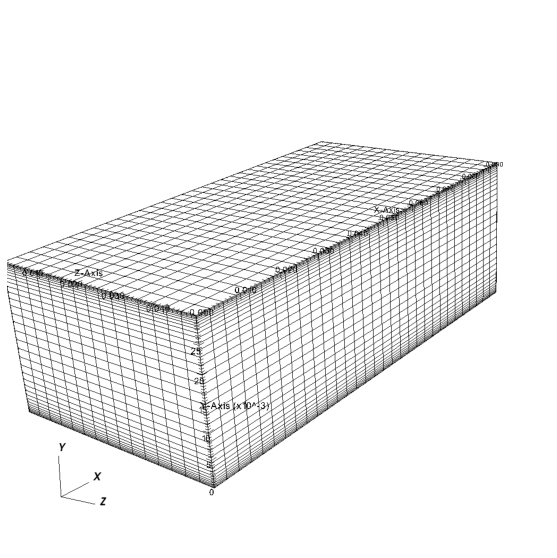

In [3]:
from trustutils import visit

a = visit.Show("RK3/Cas.lata","Mesh","dom")
a.normal3D([-0.708227, 0.361609, 0.606344])
a.up3D([0.322195, 0.929759, -0.178153])
#a.rotation3D([20,60,-20])
a.visuOptions(["no_databaseinfo","no_legend"])
a.plot()


### Fac_sec used in all calculations

In [4]:
from trustutils import plot

Tableau=plot.Table(["facsec","Result"])
Tableau.addLigne([[1.4,"OK"]],"RRK2")
Tableau.addLigne([[1.4,"NO"]],"RRK2_impl")
Tableau.addLigne([[0.8,"NO"]],"AB2")
Tableau.addLigne([[0.7,"NO"]],"AB2_impl")
Tableau.addLigne([[1.8,"OK"]],"RK3")
Tableau.addLigne([[1.8,"NO"]],"RK3_impl")
Tableau.addLigne([["-","-"]],"-")

Tableau.addLigne([[0.7,"Improved"]],"RRK2_2")
Tableau.addLigne([[0.7,"OK"]],"RRK2_impl_2")
Tableau.addLigne([[0.4,"OK"]],"AB2_2")
Tableau.addLigne([[0.4,"OK"]],"AB2_impl_2")
Tableau.addLigne([[0.9,"Improved"]],"RK3_2")
Tableau.addLigne([[0.9,"OK"]],"RK3_impl_2")


Tableau.df

,facsec,Result
RRK2,1.4,OK
RRK2_impl,1.4,NO
AB2,0.8,NO
AB2_impl,0.7,NO
RK3,1.8,OK
RK3_impl,1.8,NO
-,-,-
RRK2_2,0.7,Improved
RRK2_impl_2,0.7,OK
AB2_2,0.4,OK


## RMS ux  comparisons

We consider first the space-avaraged vertical profiles of the uy RMS values obtained with 6 calculations (facsec 0.8 AB2, 1.4 for RRK2 and 1.8 for RK3). We see that the profiles obtained with RRK2 and AB2 disagree with the other profiles obtained by RK3 (figure 3.1). We divide the facsec value by half in all cases. As a result, coherent profiles are reported in all cases (figure 3.2). This result confirms that the stability and the precision of the employed scheme should be carefully analyzed. RRK2 with a high time step blocks the transitional zone and leads to small RMS values. AB2 requires a small time step to predict a precise transitional solution.

### Large facsec values: wrong results

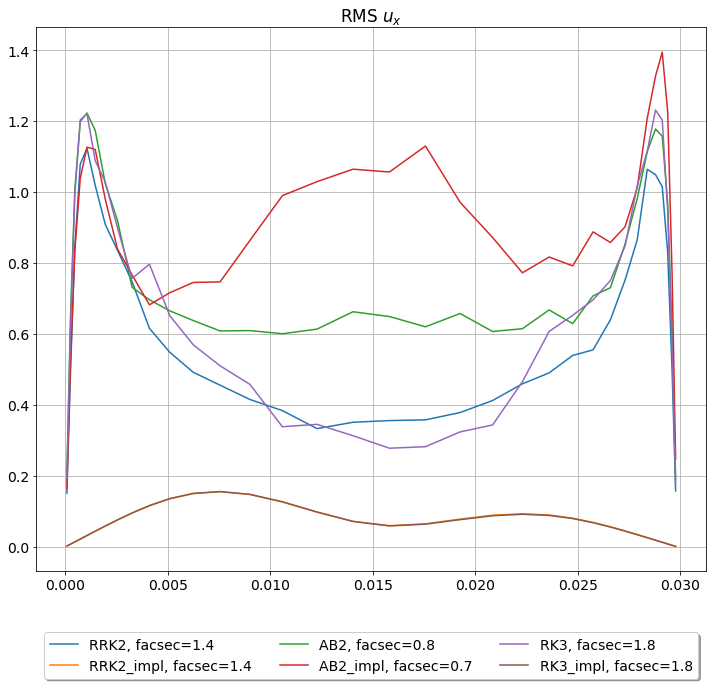

In [5]:
a = plot.Graph("RMS $u_x$")

x = plot.loadText("RRK2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2, facsec=1.4')
a.label("Y [m]",'RMS $u_x$')

x = plot.loadText("RRK2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2_impl, facsec=1.4')

x = plot.loadText("AB2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='AB2, facsec=0.8')

x = plot.loadText("AB2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='AB2_impl, facsec=0.7')

x = plot.loadText("RK3/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3, facsec=1.8')

x = plot.loadText("RK3_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3_impl, facsec=1.8')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Smaller facsec values : OK

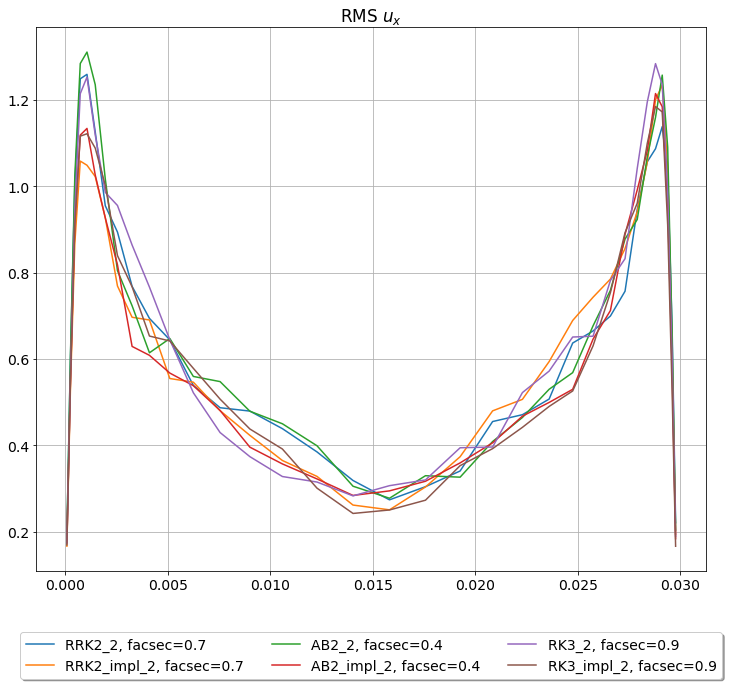

In [6]:
a = plot.Graph("RMS $u_x$")

x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2_2, facsec=0.7')
a.label("Y [m]",'RMS $u_x$')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2_impl_2, facsec=0.7')

x = plot.loadText("AB2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='AB2_2, facsec=0.4')

x = plot.loadText("AB2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='AB2_impl_2, facsec=0.4')

x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3_impl_2, facsec=0.9')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Comparisons for RK3 : facsec 1.8 vs 0.9

We compare the results obtained by RK3 for both facsecs (see figure 3.3). We see in particular that a lower facsec is required when the diffusion is implicited. This can be justified as follows: when the scheme is explicit, the time step is selected as that of the viscous one (its more dominant than the convective one). As a result, the scheme is able to capture the turbulent transition because the time step is sufficiently small. In the other case, when the diffusion is implicit, the time step is selected from that corresponding to the convective term. As a result, for a facsec of 1.8, the time step is not sufficiently small and the transitional behavior of the flow is not reproduced (see figure 3.4). We report the same behavior with RRK2 (figures 3.5 and 3.6).

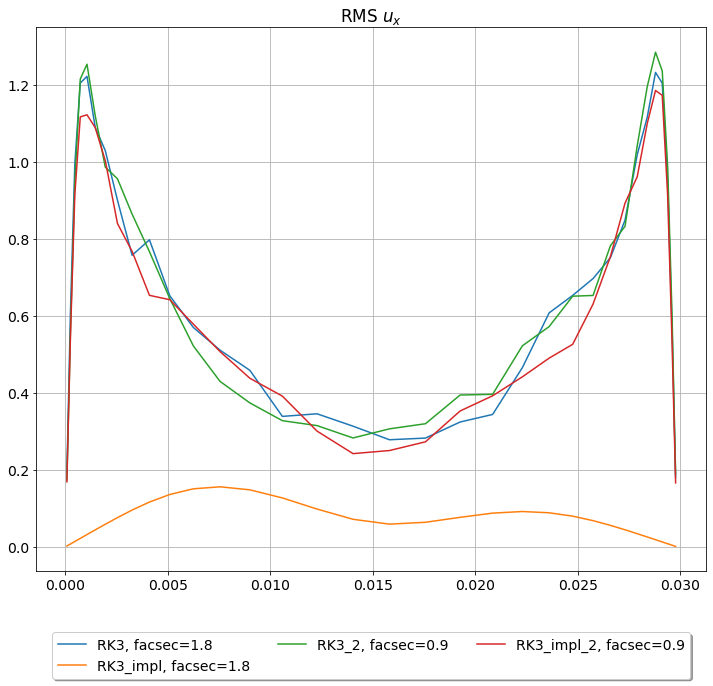

In [7]:
a = plot.Graph("RMS $u_x$")

x = plot.loadText("RK3/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3, facsec=1.8')
a.label("Y [m]",'RMS $u_x$')


x = plot.loadText("RK3_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3_impl, facsec=1.8')


x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RK3_impl_2, facsec=0.9')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Comparisons for RK3 : dt explicit vs semi-implicit

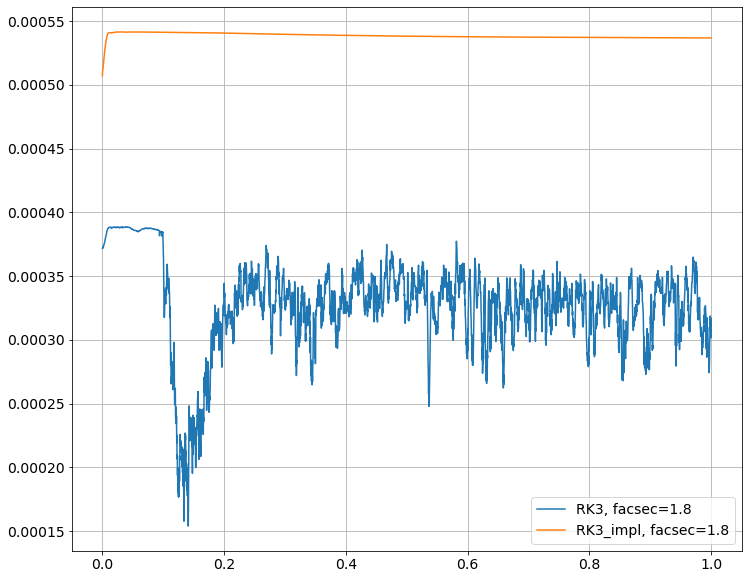

In [8]:
a = plot.Graph()

x = plot.loadText("RK3/Cas.dt_ev")
a.add(x[0],x[1],label='RK3, facsec=1.8')
a.label("t [s]",'dt [s]')

x = plot.loadText("RK3_impl/Cas.dt_ev")
a.add(x[0],x[1],label='RK3_impl, facsec=1.8')


### Comparisons for RK2 : facsec 1.4 vs 0.7

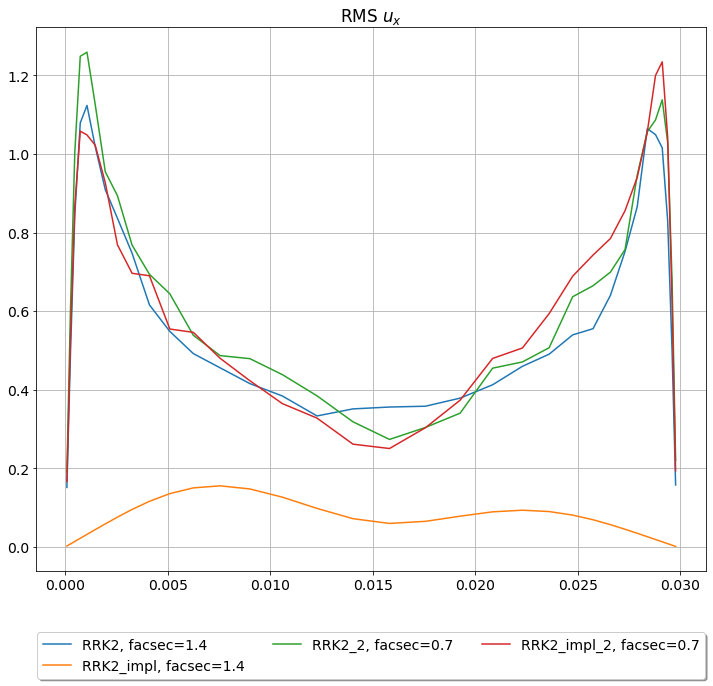

In [9]:
a = plot.Graph("RMS $u_x$")

x = plot.loadText("RRK2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2, facsec=1.4')
a.label("Y [m]",'RMS $u_x$')

x = plot.loadText("RRK2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2_impl, facsec=1.4')


x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2_2, facsec=0.7')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[4],label='RRK2_impl_2, facsec=0.7')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Comparisons for RK3 : dt explicit vs semi-implicit

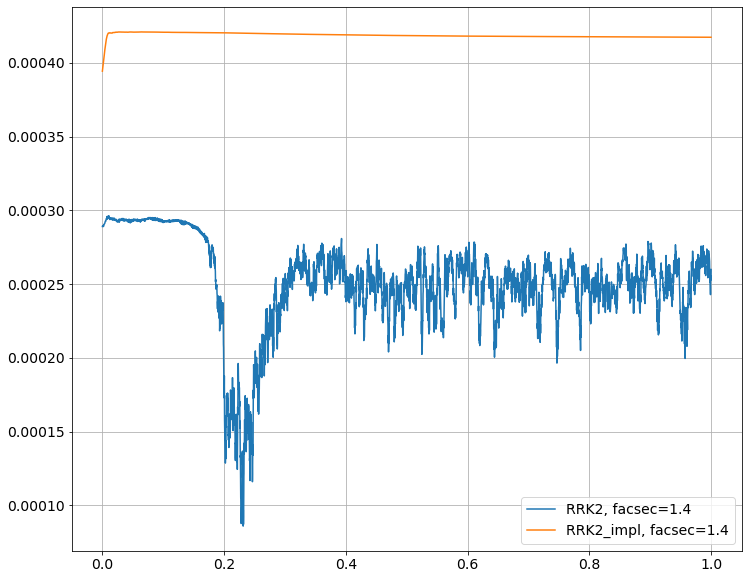

In [10]:
a = plot.Graph()

x = plot.loadText("RRK2/Cas.dt_ev")
a.add(x[0],x[1],label='RRK2, facsec=1.4')
a.label("t [s]", 'dt [s]')

x = plot.loadText("RRK2_impl/Cas.dt_ev")
a.add(x[0],x[1],label='RRK2_impl, facsec=1.4')


## RMS uy comparisons

Same observation as before ... Here, we see also that large facsec values for RRK2 and RK3 with a semi-implicit option predict zero RMS (transitional zone is blocked with large dt values for same reason as stated before)!!! Improved results are obtained when the facsec is divided by 2. NOTE: a convergence and a sensitivity analysis should be done (not considered here). 

### Large facsec values: wrong results

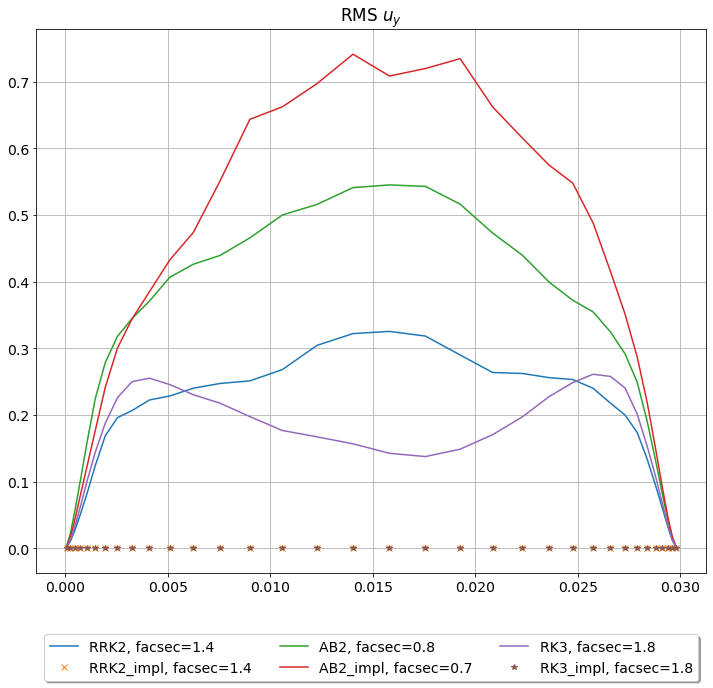

In [11]:
a = plot.Graph("RMS $u_y$")

x = plot.loadText("RRK2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='RRK2, facsec=1.4')
a.label("Y [m]",'RMS $u_y$')

x = plot.loadText("RRK2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],marker='x',label='RRK2_impl, facsec=1.4')

x = plot.loadText("AB2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='AB2, facsec=0.8')

x = plot.loadText("AB2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='AB2_impl, facsec=0.7')

x = plot.loadText("RK3/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='RK3, facsec=1.8')

x = plot.loadText("RK3_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],marker='*',label='RK3_impl, facsec=1.8')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Smaller facsec values : OK

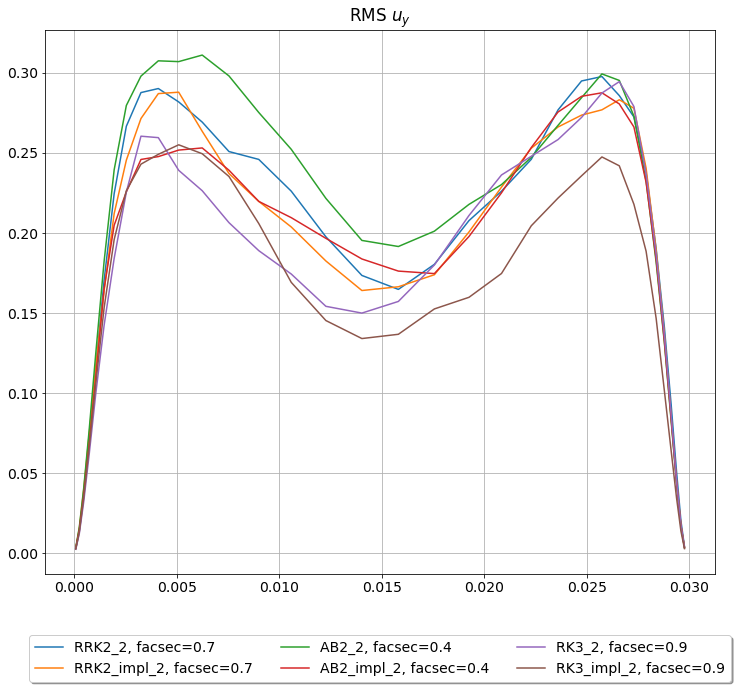

In [12]:
a = plot.Graph("RMS $u_y$")

x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='RRK2_2, facsec=0.7')
a.label("Y [m]",'RMS $u_y$')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='RRK2_impl_2, facsec=0.7')

x = plot.loadText("AB2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='AB2_2, facsec=0.4')

x = plot.loadText("AB2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='AB2_impl_2, facsec=0.4')

x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[5],label='RK3_impl_2, facsec=0.9')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

## RMS uz comparisons

Nothing new to comment on...

### Large facsec values: wrong results

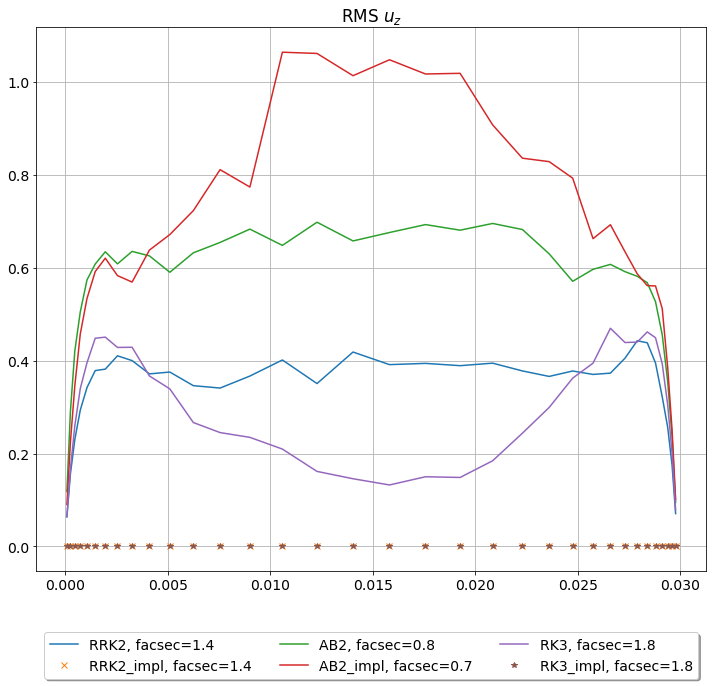

In [13]:
a = plot.Graph("RMS $u_z$")

x = plot.loadText("RRK2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='RRK2, facsec=1.4')
a.label("Y [m]",'RMS $u_z$')

x = plot.loadText("RRK2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],marker='x',label='RRK2_impl, facsec=1.4')

x = plot.loadText("AB2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='AB2, facsec=0.8')

x = plot.loadText("AB2_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='AB2_impl, facsec=0.7')

x = plot.loadText("RK3/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='RK3, facsec=1.8')

x = plot.loadText("RK3_impl/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],marker='*',label='RK3_impl, facsec=1.8')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Smaller facsec values : OK

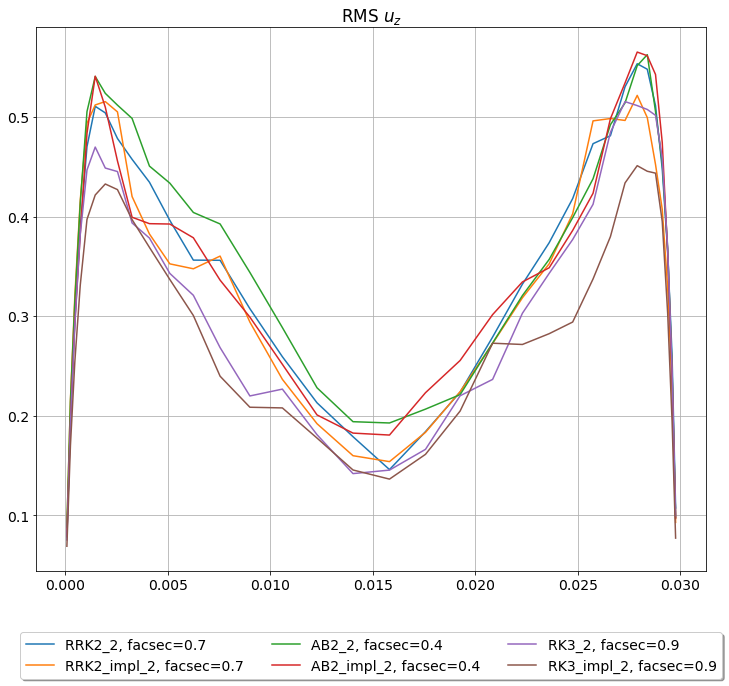

In [14]:
a = plot.Graph("RMS $u_z$")

x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='RRK2_2, facsec=0.7')
a.label("Y [m]",'RMS $u_z$')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='RRK2_impl_2, facsec=0.7')

x = plot.loadText("AB2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='AB2_2, facsec=0.4')

x = plot.loadText("AB2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='AB2_impl_2, facsec=0.4')

x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[6],label='RK3_impl_2, facsec=0.9')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

## Comparisons of different quantities

We provide comparisons in this section for the different quantities (see label of each axis in figures 6.1 - 6.3). Only the smaller facsec values are considered.

### ux

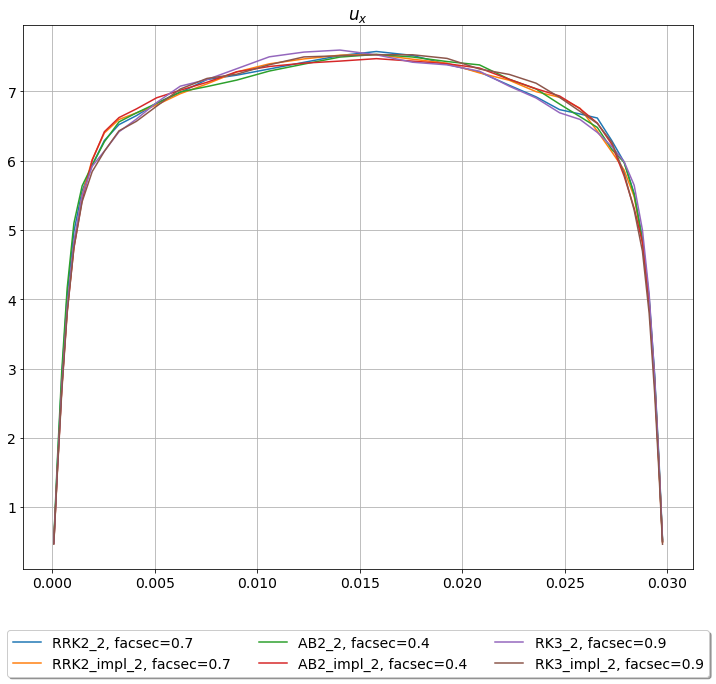

In [15]:
a = plot.Graph("$u_x$")

x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[1],label='RRK2_2, facsec=0.7')
a.label("Y [m]",'RMS $u_x$')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[1],label='RRK2_impl_2, facsec=0.7')

x = plot.loadText("AB2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[1],label='AB2_2, facsec=0.4')

x = plot.loadText("AB2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[1],label='AB2_impl_2, facsec=0.4')

x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[1],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[1],label='RK3_impl_2, facsec=0.9')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### $<u_x u_y> - <u_x> <u_y>$

In [16]:
a = plot.Graph("$<u_x u_y> - <u_x> <u_y>$")

x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[7],label='RRK2_2, facsec=0.7')
a.label("Y [m]", '$<u_x u_y> - <u_x> <u_y>$')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[7],label='RRK2_impl_2, facsec=0.7')

x = plot.loadText("AB2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[7],label='AB2_2, facsec=0.4')

x = plot.loadText("AB2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[7],label='AB2_impl_2, facsec=0.4')

x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[7],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[7],label='RK3_impl_2, facsec=0.9')

*a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

SyntaxError: can't use starred expression here (<ipython-input-16-cc05ef6db712>, line 25)

### $<u_x u_z> - <u_x> <u_z>$

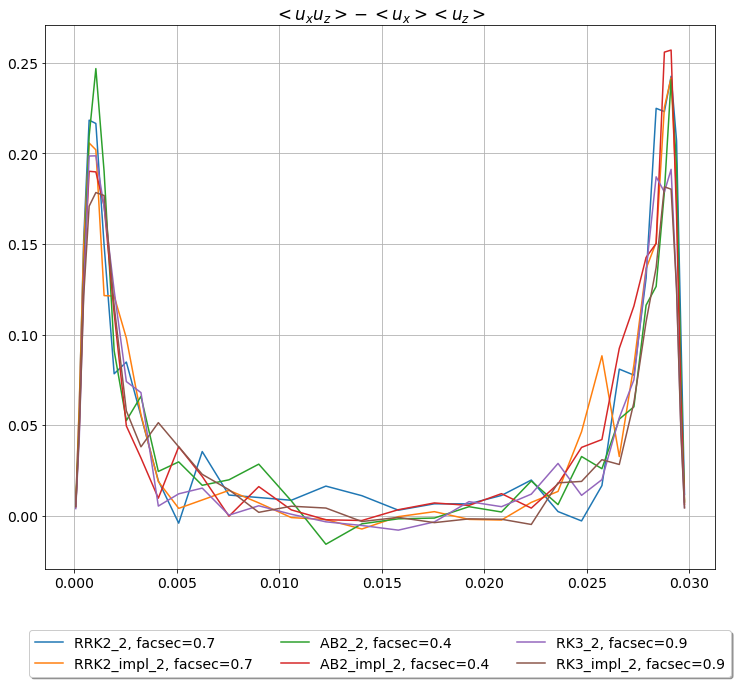

In [17]:
a = plot.Graph("$<u_x u_z> - <u_x> <u_z>$")

x = plot.loadText("RRK2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[8],label='RRK2_2, facsec=0.7')
a.label("Y [m]",'$<u_x u_z> - <u_x> <u_z>$')

x = plot.loadText("RRK2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[8],label='RRK2_impl_2, facsec=0.7')

x = plot.loadText("AB2_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[8],label='AB2_2, facsec=0.4')

x = plot.loadText("AB2_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[8],label='AB2_impl_2, facsec=0.4')

x = plot.loadText("RK3_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[8],label='RK3_2, facsec=0.9')

x = plot.loadText("RK3_impl_2/Moyennes_spatiales_vitesse_rho_mu_fin")
a.add(x[0],x[8],label='RK3_impl_2, facsec=0.9')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)


## Conclusions

In this report, comparisons between explicit and semi-implicit (diffusion implicit) schemes are presented.  A periodic channel test case is investigated in its laminar-to-turbulent transitional behavior. We show that the time step should be carefully controlled otherwise the transition is not reproduced. The **facsec** parameter of TRUST helps in reducing the timestep and thus can be used to control dt. We also show that results obtained with a semi-implicit scheme can match well with those predicted by a pure explicit one (if a good time-step is used). We note that the Adam-Bashforth scheme requires small time steps (facsec = 0.4 considered here for a particular mesh) in order to reproduce correctly the transition. Similarly for RRK2 and RK3 where the facsec should be 0.7 and 0.9 respectively (mainly when the viscous term is implicitly treated). A grid sensitivity analysis (not considered in this study) might also be interesting to analyze how the facsec behaves with the mesh refinement.

In [18]:
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
RRK2/Cas,is244522,Linux,314.617,0.0770758,15810
RK3/Cas,is244522,Linux,352.028,0.11352,15810
AB2/Cas,is244522,Linux,321.361,0.0407845,15810
RRK2_2/Cas,is244522,Linux,616.632,0.0740683,15810
RK3_2/Cas,is244522,Linux,724.378,0.112803,15810
AB2_2/Cas,is244522,Linux,596.498,0.0403419,15810
RRK2_impl/Cas,is244522,Linux,122.804,0.0513798,15810
RK3_impl/Cas,is244522,Linux,126.727,0.0681352,15810
AB2_impl/Cas,is244522,Linux,395.282,0.0520678,15810
RRK2_impl_2/Cas,is244522,Linux,601.709,0.0929328,15810
